In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
rainfall_data=pd.read_csv("weatherAUS.csv")
rainfall_data.head()
rainfall_data.shape
rainfall_data.info()
rainfall_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
rainfall_data.drop('Date',inplace=True,axis=1)
rainfall_data.drop('Location',inplace=True,axis=1)
rainfall_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
rainfall_data['RainToday'].value_counts()
rainfall_data['RainTomorrow'].value_counts()
rainfall_data['RainToday'].replace({'No':0,'Yes':1},inplace=True)
rainfall_data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
rainfall_data['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

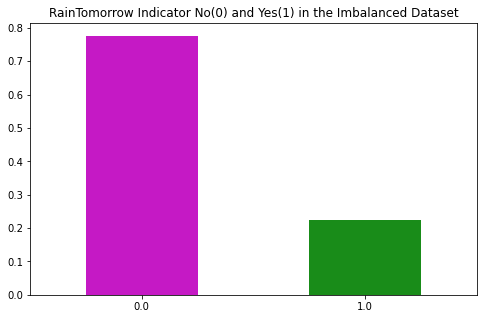

In [8]:
fig = plt.figure(figsize=(8,5))
rainfall_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color=['m','green'],rot=0,alpha=0.9)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

In [9]:
from sklearn.utils import resample

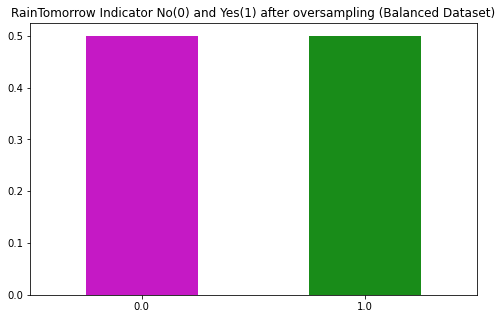

In [10]:
no = rainfall_data[rainfall_data.RainTomorrow == 0]# stores all the '0' values in it
yes = rainfall_data[rainfall_data.RainTomorrow == 1]# stores all the '1' values in it

# as we are oversampling the minority class i.e 'yes' values by using the resample()

yes_oversample = resample(yes, replace=True , n_samples=len(no) , random_state = 123)
oversample = pd.concat([yes_oversample , no])

## Now let us plot the figure

fig=plt.figure(figsize =(8,5))
oversample.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color=['m','green'],rot=0,alpha=0.9)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after oversampling (Balanced Dataset)')
plt.show()

<AxesSubplot:>

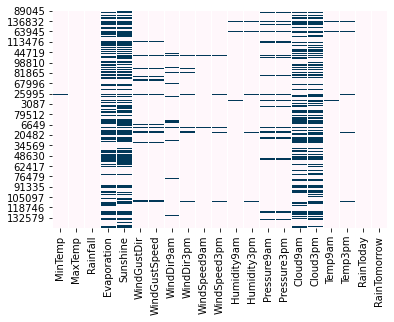

In [11]:
import seaborn as sns
sns.heatmap(oversample.isna(),cbar=False, cmap='PuBu')

In [12]:
total = oversample.isnull().sum().sort_values(ascending=False)
percent = (oversample.isnull().sum()/oversample.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing.head(23)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562
Pressure9am,21728,0.098481
WindGustDir,15491,0.070212
WindGustSpeed,15354,0.069591
WindDir9am,14728,0.066754
WindDir3pm,6440,0.029189


In [13]:
oversample.select_dtypes(include=['object']).columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [14]:
## Impute the categorical variable with 'Mode'

oversample['WindGustDir'] = oversample['WindGustDir'].fillna(oversample['WindGustDir'].mode()[0])
oversample['WindDir9am'] = oversample['WindDir9am'].fillna(oversample['WindDir9am'].mode()[0])
oversample['WindDir3pm'] = oversample['WindDir3pm'].fillna(oversample['WindDir3pm'].mode()[0])

In [15]:
oversample.isna().sum()

MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir           0
WindGustSpeed     15354
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RainTomorrow          0
dtype: int64

In [16]:
## We will convert the categorical features to continuous features with label encoding

## lbr =  LabelEncoder()
## rainfall_data['Date']=lbr.fit_transform(rainfall_data['Date'])

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversample.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversample[col] = lencoders[col].fit_transform(oversample[col])

In [17]:
oversample.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [18]:
import warnings
warnings.filterwarnings("ignore")

## Multiple Imputation by Chained Equations

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversample.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversample)

In [19]:
MiceImputed.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.300000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.020732
Sunshine          5.979919
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.775862
Pressure3pm       8.800000
Cloud9am          4.000000
Cloud3pm          3.699036
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RainTomorrow      1.000000
dtype: float64


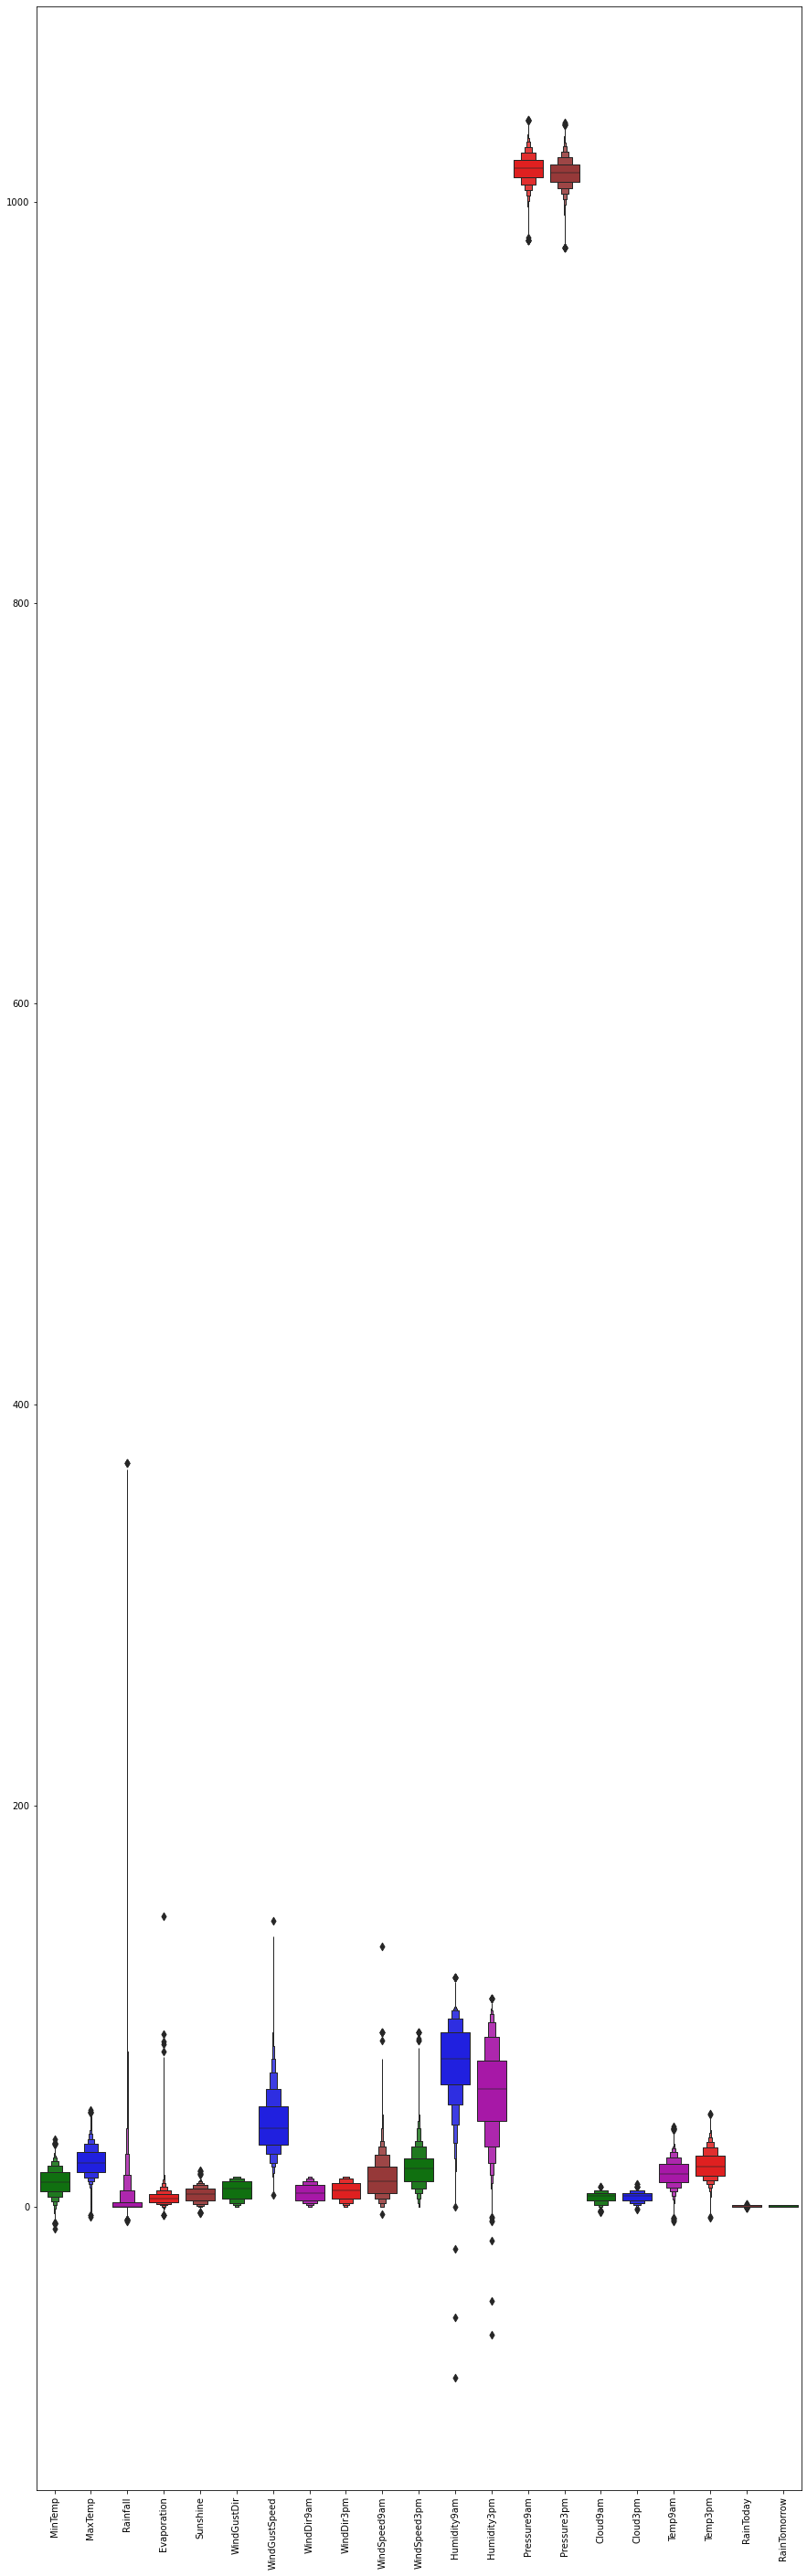

In [21]:
colours=['green','blue','m','red','brown']
plt.figure(figsize=(15,50))
sns.boxenplot(data=MiceImputed,palette=colours)
plt.xticks(rotation=90)
plt.show()

In [22]:
## Removing the outliers from the dataset

MiceImputed = MiceImputed[~((MiceImputed<(Q1-1.5*IQR))|(MiceImputed>(Q3+1.5*IQR))).any(axis=1)]

MiceImputed.shape

(170514, 21)

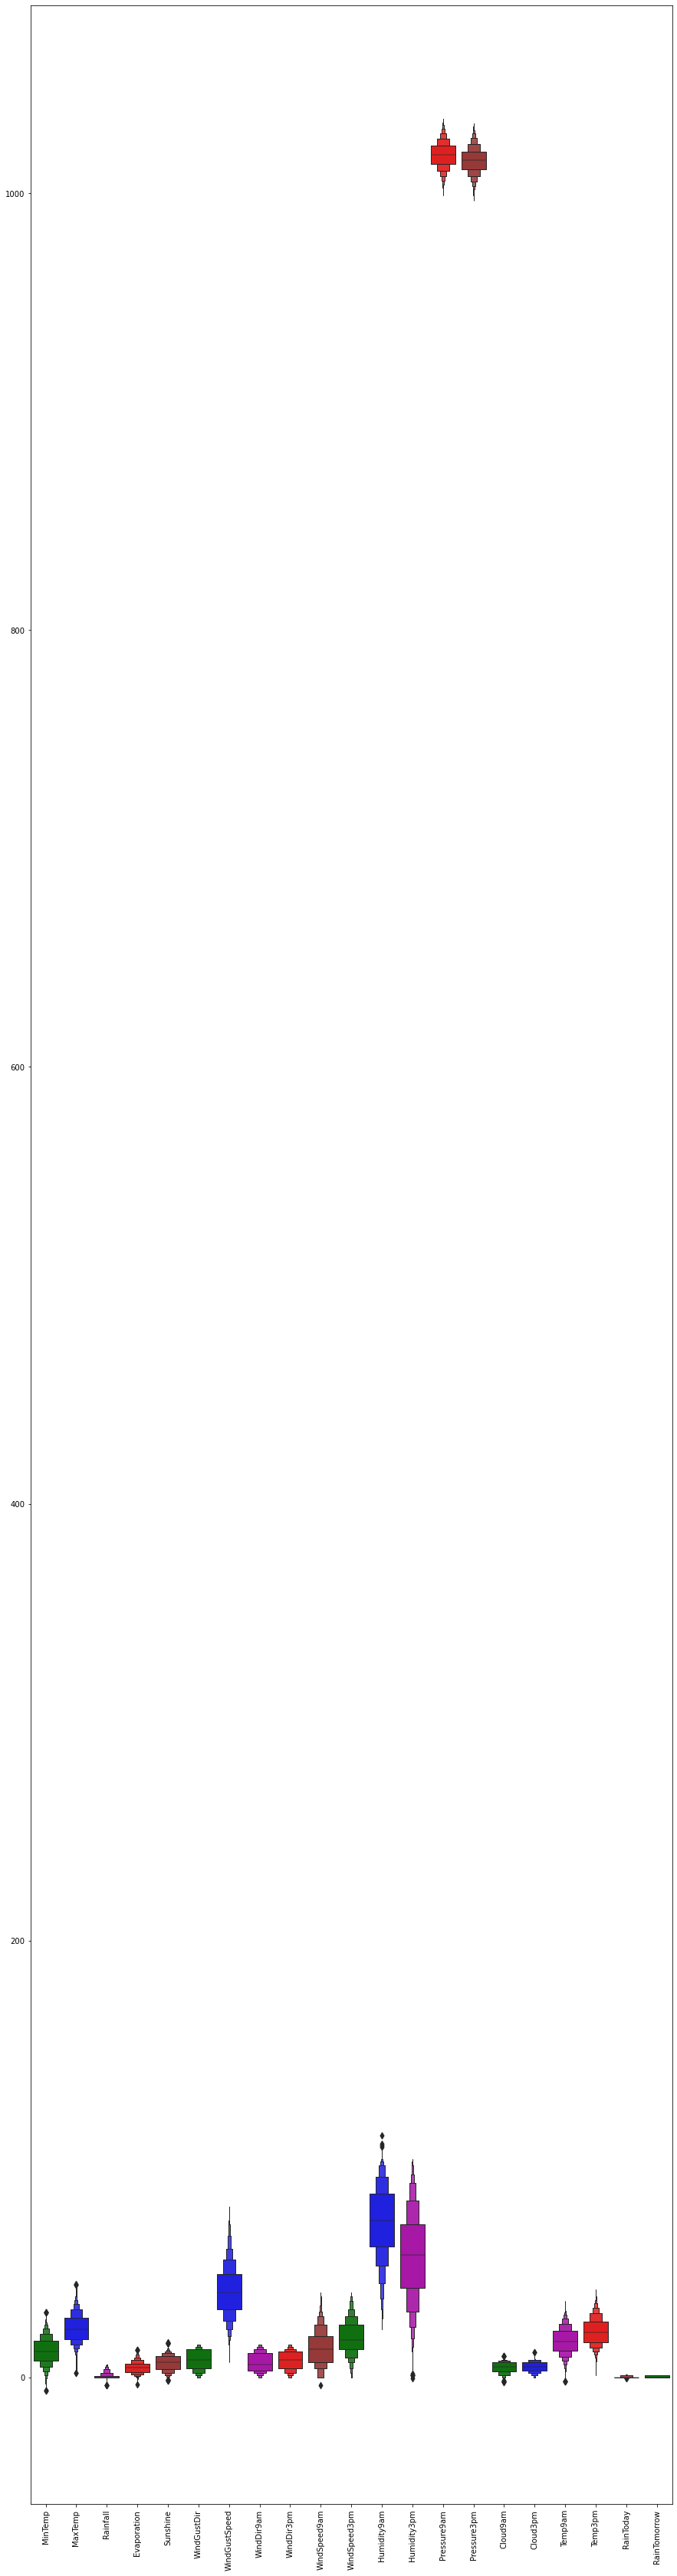

In [23]:
colours=['green','blue','m','red','brown']
plt.figure(figsize=(15,60))
sns.boxenplot(data=MiceImputed,palette=colours)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

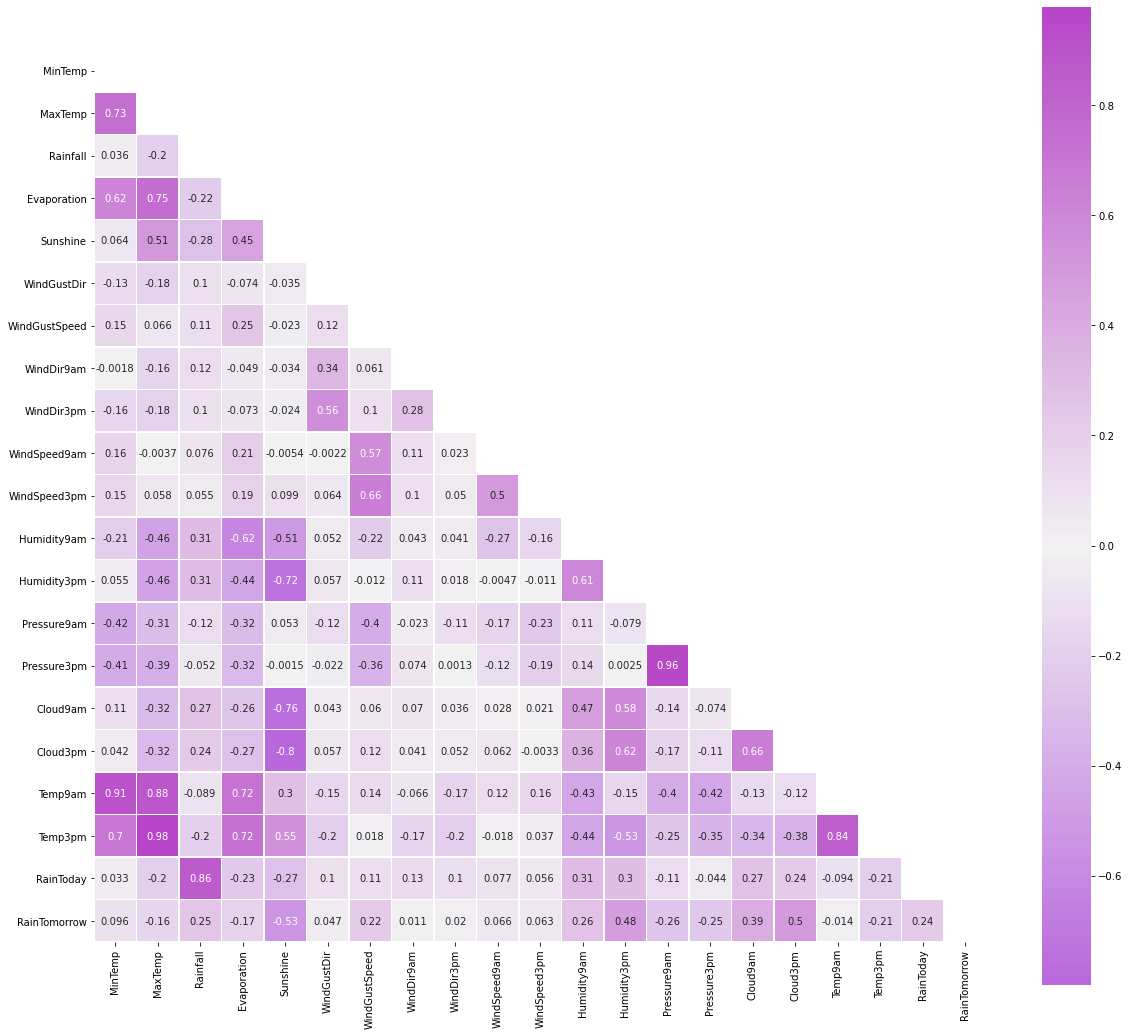

In [24]:
corr = MiceImputed.corr()
f,ax = plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(corr,dtype = np.bool))
cmap = sns.diverging_palette(650,300,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax = None,center = 0,square = True,annot = True,linewidth = .5,cbar_kws = {'shrink':.9})

In [25]:
# Standardizing data
# initialising the minmax scaler function in to r_scaler
# scaling the dataset keeping the columns name

from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
#r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.fit_transform(MiceImputed),index=MiceImputed.index,columns=MiceImputed.columns)

In [26]:
x = MiceImputed[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
y = MiceImputed['RainTomorrow']

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(class_weight="balanced")

lr.fit(x,y)
y_pred =lr.predict(x)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7864046353965071

In [27]:
MiceImputed.tail(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145458,7.8,27.0,0.0,6.664084,10.737536,9.0,28.0,10.0,3.0,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [28]:
MiceImputed['WindSpeed3pm'].tail(1)

145458    7.0
Name: WindSpeed3pm, dtype: float64

In [29]:
lr.predict([[24.2,31.1,0.0,5.8,4.2,10.0,50.0,10.0,10.0,24.0,28.0,73.0,62.0,1014.1,1010.1,3.0,5.0,27.0,29.9,0.0]])[0]

1.0

In [30]:
import pickle
with open('rainfall.pkl','wb') as f:
    pickle.dump(lr,f)